<a href="https://colab.research.google.com/github/m-a-hasan/ai-colab/blob/main/Appian_Ted_Talk_Image_Processing_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome Appianites to the TED talk!

Please upload an image and let the predict unfold.

In [ ]:
# Check if we are using GPU for faster runtime
!nvidia-smi

Tue Oct 18 00:57:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Check file numbers and folders
import os
from PIL import Image

for dirpath, dirnames, filenames in os.walk("drive/MyDrive/dev/ai/images"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in 'drive/MyDrive/dev/ai/images'.
there are 10 directories and 1 images in 'drive/MyDrive/dev/ai/images/test'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/bed'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/mouse'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/washing'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/pen'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/tv'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/chair'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/keyboard'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/backpack'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/laptop'.
there are 0 directories and 11 images in 'drive/MyDrive/dev/ai/images/test/car'.
there are 10 directori

In [ ]:
# Setup image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

test_dir= "drive/MyDrive/dev/ai/images/test/"
train_dir = "drive/MyDrive/dev/ai/images/train/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          class_mode="categorical",
                                                          batch_size=BATCH_SIZE)

print("Testing images:")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size=IMAGE_SHAPE,
                                                        class_mode="categorical",
                                                        batch_size = BATCH_SIZE)

Training images:
Found 600 images belonging to 10 classes.
Testing images:
Found 100 images belonging to 10 classes.


In [ ]:
import tensorflow as tf

In [ ]:
# Create tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard logfiles to {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes=10):
  """
  Takes a tensorflow hub URL, creates a Sequential model using it and returns that model
  """

  # Download a pretrained model and save it as a keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze all the underlying layer
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))

  # Create model
  model = tf.keras.Sequential([
      feature_extractor_layer, # Use this as the base
      layers.Dense(num_classes, activation="softmax", name="output_layer") # Create our own output layer
  ])

  return model

In [ ]:
efficientnet_v1_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# Create model
efficientnet_v1_model = create_model(model_url=efficientnet_v1_url,
                                     num_classes=train_data_10_percent.num_classes)

# Compile model
efficientnet_v1_model.compile(optimizer=tf.keras.optimizers.Adam(),
                              loss="categorical_crossentropy",
                              metrics=["accuracy"])

# Fit
efficientnet_v1_history = efficientnet_v1_model.fit(train_data_10_percent,
                                                    epochs=5,
                                                    steps_per_epoch=len(train_data_10_percent),
                                                    validation_data=test_data_10_percent,
                                                    validation_steps=len(test_data_10_percent),
                                                    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                           experiment_name="efficientnetB0")])

Saving tensorboard logfiles to tensorflow_hub/efficientnetB0/20221018-005808
Epoch 1/5
 4/19 [=====>........................] - ETA: 5s - loss: 2.2075 - accuracy: 0.1953

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 39s 1s/step - loss: 1.5073 - accuracy: 0.6600 - val_loss: 0.8481 - val_accuracy: 0.9400
Epoch 2/5
19/19 [==============================] - 21s 1s/step - loss: 0.4652 - accuracy: 0.9800 - val_loss: 0.3845 - val_accuracy: 0.9600
Epoch 3/5
19/19 [==============================] - 23s 1s/step - loss: 0.2045 - accuracy: 0.9883 - val_loss: 0.2617 - val_accuracy: 0.9700
Epoch 4/5
19/19 [==============================] - 21s 1s/step - loss: 0.1276 - accuracy: 0.9950 - val_loss: 0.2160 - val_accuracy: 0.9700
Epoch 5/5
19/19 [==============================] - 21s 1s/step - loss: 0.0930 - accuracy: 0.9950 - val_loss: 0.1888 - val_accuracy: 0.9700


In [ ]:
from pandas import DataFrame as df
import matplotlib.pyplot as plt

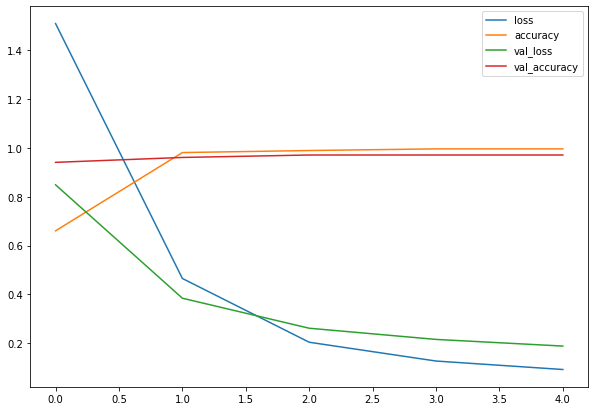

In [ ]:
df(efficientnet_v1_history.history).plot(figsize=(10, 7))

In [ ]:
# Get the class names from folders
import pathlib
import numpy as np

data_dir = pathlib.Path("drive/MyDrive/dev/ai/images/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))

class_names = class_names[1:]
type(class_names), class_names

(numpy.ndarray,
 array(['backpack', 'bed', 'car', 'chair', 'keyboard', 'laptop', 'mouse',
        'pen', 'tv', 'washing'], dtype='<U9'))

In [ ]:
# Let's reshape the image and turn it into tensor with a function
def load_and_prep_image(filename, img_shape=224):
  """
  1. Reads an image from a filename and turns it into a tensor
  2. Reshapes the image to (image_shape, image_shape, color_channel)
  """
  # Read in target file
  img = tf.io.read_file(filename)

  # Decode the image into a tensor and ensure it has 3 color channels as sometimes images can have 4 color channels
  img = tf.image.decode_image(img, channels=3)

  # Resize image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports image located at a filename, makes a prediction using the trained model and plots the image with the predicted class as title.
  """
  # Import image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot image and predicted class
  plt.figure(figsize=(7, 10))
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
class_names

array(['backpack', 'bed', 'car', 'chair', 'keyboard', 'laptop', 'mouse',
       'pen', 'tv', 'washing'], dtype='<U9')

there are 0 directories and 10 images in 'drive/MyDrive/dev/ai/images/demo/'.
1/1 [==============================] - 0s 24ms/step


InvalidArgumentError: ignored

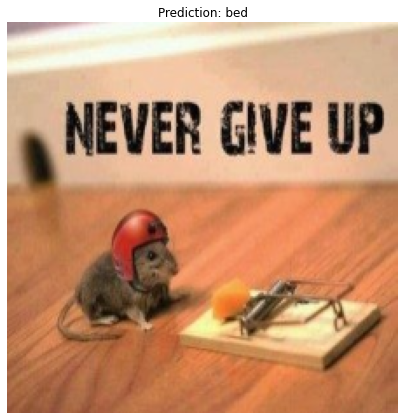

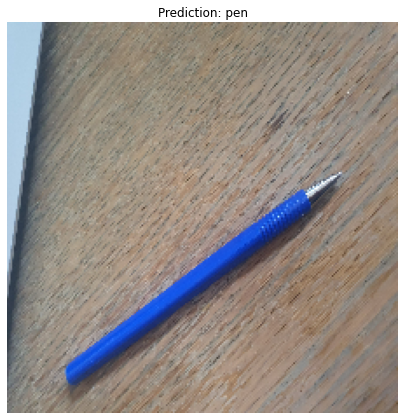

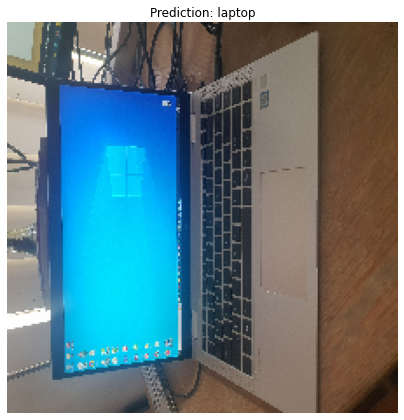

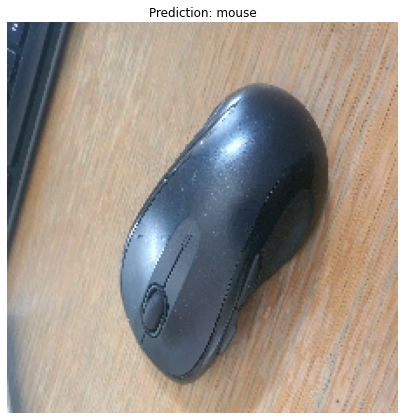

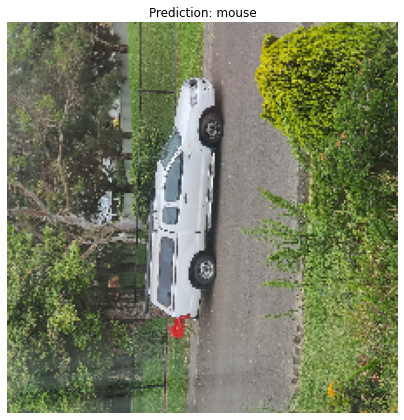

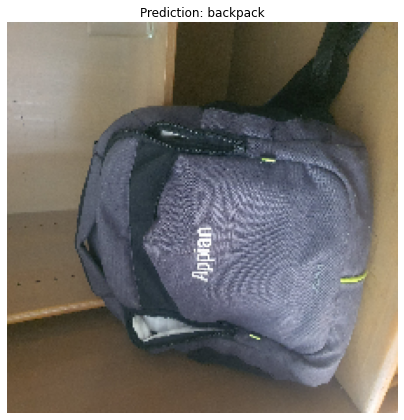

In [ ]:
for dirpath, dirnames, img_names in os.walk("drive/MyDrive/dev/ai/images/demo/"):
  print(f"there are {len(dirnames)} directories and {len(img_names)} images in '{dirpath}'.")

for demo_pic in img_names:
  pred_and_plot(efficientnet_v1_model, dirpath + demo_pic, class_names)